# Anomaly Detection in Renewable Energy Plant and Oil & Gas Performance Data Project



In renewable energy and the oil & gas sector, performance data is obtained using sensors to monitor various parameters like production, pressure, temperature, and flows.therfore The data obtained forms the basis of ensuring that the equipment can operate with maximum efficiency and safety to cut down on operational costs and ensure continued production.

Therefore, the detection of anomalies in the performance data is vital to :

1- Early detection of problems : It allows one to see faults before they happen.  

2- Safety assurance : It prevents fatal accidents from occurring.

3- Reduction of operating cost : The need for emergency repairs will be less.

4- Improvement in operating efficiency : Equipment performance is maintained at optimum.

5- Regulatory compliance : One may comply with laws and regulations.

6 - Improvement in continuity of business operation : There won't be any unexpected stops in the lines of production.



# Step 1


#`Prepare the dependences and libraries.`



In [ ]:
!python --version

import time
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Python 3.12.5


# Step 2
# ` Data Stream Simulation by Design a function to emulate a data stream, incorporating regular patterns, seasonal elements, and random noise.`

In [ ]:
np.random.seed(42)

def simulate_energy_Data(size=60000): #This function creates a simulated data flow size=60000 means that the default data size to be generated is 3000 data points.

   time = np.linspace(0, 24, size)
# Create a time matrix representing the time periods over which performance data will be collected.
# This line creates an array of values ​​evenly distributed between 0 and 30 (the time units could be hours, days, or any other time unit).
# Based on the number of points in the data (determined by the size variable). Which equals 60000
# These time values ​​are used as a reference point to generate periodic patterns in performance data, such as daily or weekly changes in energy production.


   base_signal = 100 + 20 * np.sin(time)
# Seasonal pattern repeats periodically or over time. Here we use sine, as the values ​​fluctuate periodically over time.
# In our scenario representing daily or weekly changes in power plant production.


   noise = np.random.normal(0, 2, size)
# Generate random noise using a normal distribution
# To simulate unexpected natural changes in power plant performance


   anomalies = np.random.choice(size, size=int(size * 0.02), replace=False)
# Generate anomaly points based on 2% of the data size.
# These points are randomly selected to simulate faults or significant deviations from normal performance in the power plant.


   Data_stream = base_signal + noise  #Generate Data


   Data_stream[anomalies] += np.random.normal(30, 10, len(anomalies))



# Entry synthetic anomalies to performance data.
# Anomaly locations are modified by adding anomalies with a normal distribution with a mean of 30 and a standard deviation of 10.
# Sumulate unusual values ​​that can indicate performance issues such as crashes or Downtime in power plant


   return time, Data_stream, anomalies #Return the Data streming, Time values and anomaly locations.



time_vals, data_stream, anomalies = simulate_energy_Data()  # Call function, return time, Data_stream and anomalies.


#### optmaization Step ####

scaler = StandardScaler()
data_stream_scaled = scaler.fit_transform(data_stream.reshape(-1, 1))


#Standardization is the process of redistributing data so that its mean is 0 standard deviation 1.
#The goal is to make the data standardly distributed so that it is approximately evenly distributed around zero.
#helps improve the performance of models.


pca = PCA(n_components=1)
data_stream_pca = pca.fit_transform(data_stream_scaled)


#We use PCA to reduce the complexity of the calculations and increase the computational cost.



#Print the first 10 Data (checking process)

#print("First 10 time values:", time_vals[:10])
#print("First 10 data values:", data_stream[:10])
#print("First 10 anomaly locations:", anomalies[:10])



# Step 3


`Write the function to detect anomalies detection and configre the algorithm `



> I Choiced the Isolation Forest Algorithm
because appropriate for the following reasons:

Adapting to Concept Drift It resists concept drift since no assumption concerning the distribution of incoming data is made. It isolates outliers, and this can serve effectively when concepts in the data change with time.alos Addressing Seasonal Variation Since the Isolation Forest is not targeted at seasonality, the procedure cuts out outliers without considering the underlying distribution hence, it will detect anomalies when periodic patterns take place.




In [ ]:
# Function to detect anomalies
def detect_anomalies_iforest(data,  n_estimators=200, max_samples=0.8):

    data = data.reshape(-1, 1)  # Reshape the data into a 2D array (required by Isolation Forest)

    model = IsolationForest(n_estimators=n_estimators, max_samples=max_samples, n_jobs=-1, random_state=42)

    model.fit(data)  # Train the model on the data

    anomalies = model.predict(data)  # Predict anomalies


    return np.where(anomalies == -1)[0]  # Return indices of detected anomalies


# Step 4



`Run, train, predict and calcualte the accurecy of model`



In [ ]:

# Start the anomaly detection process

print("Starting anomaly detection...")

start_time = time.time() # Record the start time to measure the duration of the anomaly detection process

detected_anomalies_pca, anomaly_predictions_pca = detect_anomalies_iforest(data_stream_pca) # Detect anomalies using the PCA-transformed data and store the results


end_time = time.time() # Record the end time after the detection process is complete


execution_time = end_time - start_time # Calculate the total time taken for the anomaly detection process

print(f"Time taken for anomaly detection : {execution_time:.2f} seconds")
print("Anomalies detected at indices:", len(detected_anomalies_pca))


### Calculate the accuracy of the anomaly detection by comparing the true labels with predicted labels ###

true_labels = np.ones_like(data_stream) # Set the known anomalies in the true labels
true_labels[true_anomalies] = -1
accuracy_after = accuracy_score(true_labels, anomaly_predictions_pca) # Compute the accuracy after detecting anomalies

print(f"Accuracy: {accuracy_after:.4f}")



Starting anomaly detection...
Time taken for anomaly detection : 9.23 seconds
Anomalies detected at indices: 2417
Accuracy: 0.9659


# Step 6


`Visualization `



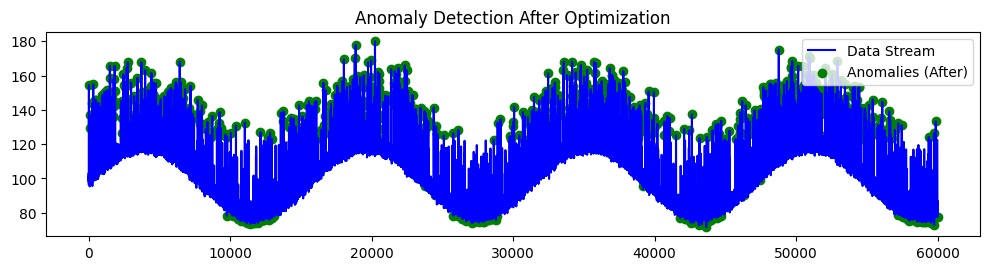

In [ ]:

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(data_stream, label="Data Stream", color="blue")
plt.scatter(detected_anomalies_pca, data_stream[detected_anomalies_pca], color='green', label="Anomalies (After)")
plt.title("Anomaly Detection After Optimization")
plt.legend()

plt.tight_layout()
plt.show()
